In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv("../data/advertising.csv", index_col="ID")
data

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [6]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
def sales_regression(feature):
    X = data[feature]
    y = data["Sales"]

    X_train, X_test, y_train, y_test = train_test_split(X , y,random_state=100, test_size= .30)

    reg = LinearRegression()
    reg.fit(np.array(X_train).reshape(-1,1) , y_train)

    preds = reg.predict(np.array(X_test).reshape(-1,1))
    print(f"MSE : {mean_squared_error(y_test, preds)}")
    print(f"R2 score : {r2_score(y_test, preds)}")

    plt.scatter(X_train, y_train , color='red', label="Train")
    plt.scatter(X_test, y_test , color='blue', label="Test")
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.legend()

    intercept = reg.intercept_
    slope = reg.coef_[0]
    plt.axline((0 , intercept),slope=slope)

### 1. TV and Sales

MSE : 7.975798532854851
R2 score : 0.5942987267783302


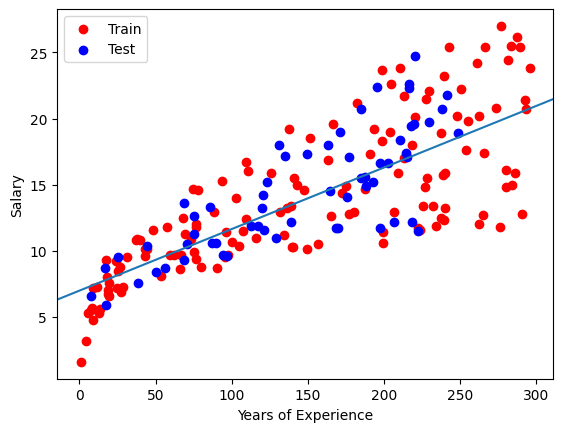

In [9]:
sales_regression("TV")

### 2. Radio and Sales

MSE : 11.388611592147727
R2 score : 0.4207007355904727


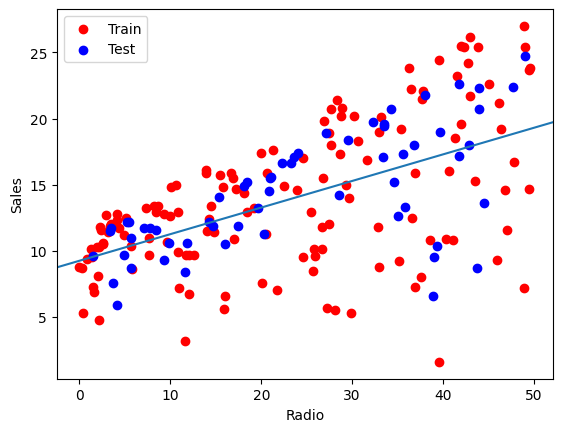

In [11]:
sales_regression("Radio")


### 3. Newspaper and Sales

MSE : 22.78312971627622
R2 score : -0.15889897366292205


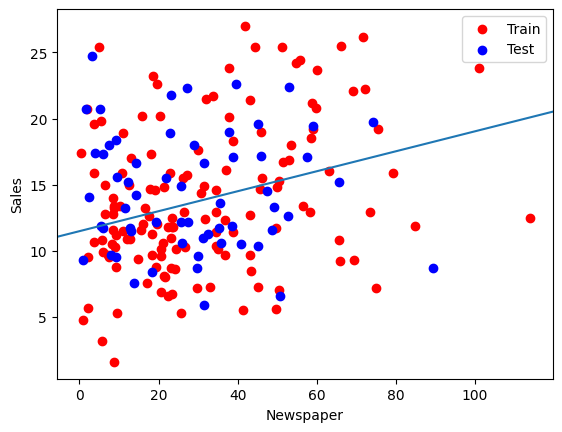

In [12]:
sales_regression("Newspaper")